# Brief Description of the project

The purpose of conducting this project is to ascertain if good governance and ease of doing business in a country have a relationship with the amount of investment it receives. I choose three countries, which are New Zealand, South Africa and Eritrea. The reason I choose these three countries is that for governance and ease of doing business, New Zealand ranks on the upper spectrum, South Africa is in the middle and Eritrea is on the lower end of these rankings, so with this, I thought it would provide a more realistic picture if there is a relationship with investment. 

Regression Analysis using the train test model will be the method chosen to conduct this statistical analysis.


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from random import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.3f}'.format
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})

# Data Cleaning

In [2]:
df_adv_eco_gdp = pd.read_csv('WEO_Data Advance economies GDP.csv')
df_adv_eco_gdp

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Australia,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",162.628,188.067,186.709,179.151,196.777,...,"1,569.32","1,518.43","1,457.39","1,234.82","1,266.27","1,385.19","1,421.30","1,391.54","1,359.33","2,020.000"
1,Austria,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",80.923,70.121,70.111,71.032,67.007,...,409.661,430.197,442.699,382.01,395.728,417.091,455.301,445.125,428.622,"2,019.000"
2,Belgium,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",123.478,102.245,89.958,85.037,81.237,...,496.467,521.799,535.529,462.383,475.931,502.521,543.98,533.157,513.087,"2,020.000"
3,Canada,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",276.035,307.246,314.639,341.863,356.728,...,"1,828.36","1,846.60","1,805.75","1,556.51","1,528.00","1,649.27","1,721.82","1,741.58","1,643.41","2,020.000"
4,Cyprus,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2.314,2.242,2.319,2.321,2.447,...,24.993,23.9,23.162,19.844,20.947,22.721,25.322,24.953,23.967,"2,020.000"
5,Czech Republic,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,...,208.858,211.686,209.359,188.033,196.272,218.629,248.95,250.686,241.455,"2,019.000"
6,Denmark,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",71.127,61.878,60.413,60.645,59.105,...,327.149,343.584,352.994,302.673,313.116,332.121,356.88,350.104,352.243,"2,019.000"
7,Estonia,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,...,23.206,25.279,26.816,23.06,24.269,26.942,30.645,31.475,31.005,"2,020.000"
8,Finland,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",53.714,52.62,53.111,51.056,53.032,...,258.454,271.366,274.934,234.558,240.705,255.558,276.112,268.996,270.637,"2,019.000"
9,France,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",702.243,618.954,588.015,562.499,532.339,...,"2,685.37","2,811.92","2,856.70","2,439.44","2,472.28","2,594.24","2,791.16","2,717.20","2,598.91","2,020.000"


In [3]:
#Filtering data only what data for New Zealand
df_NewZealand_gdp = df_adv_eco_gdp.iloc[25]
print(df_NewZealand_gdp)
print(type(df_NewZealand_gdp))

Country                                                                New Zealand
Subject Descriptor                          Gross domestic product, current prices
Units                                                                 U.S. dollars
Scale                                                                     Billions
Country/Series-specific Notes    See notes for:  Gross domestic product, curren...
1980                                                                         22.52
1981                                                                        23.439
1982                                                                        23.205
1983                                                                        22.453
1984                                                                        22.347
1985                                                                        22.508
1986                                                                         27.39
1987

In [4]:
#Converting pandas series to a dataframe
df_NewZealand_gdp_2 = pd.DataFrame(df_NewZealand_gdp)
print(df_NewZealand_gdp_2)
print(type(df_NewZealand_gdp_2))

                                                                              25
Country                                                              New Zealand
Subject Descriptor                        Gross domestic product, current prices
Units                                                               U.S. dollars
Scale                                                                   Billions
Country/Series-specific Notes  See notes for:  Gross domestic product, curren...
1980                                                                       22.52
1981                                                                      23.439
1982                                                                      23.205
1983                                                                      22.453
1984                                                                      22.347
1985                                                                      22.508
1986                        

In [5]:
#Dropping unnecessary rows cleaning the data
df_NewZealand_gdp_3 = df_NewZealand_gdp_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After'], axis = 0)

#Renaming colums
df_NewZealand_gdp_4 = df_NewZealand_gdp_3.rename(columns = {25:'New Zealand (GDP, Current Prices - USD Billions)'})
df_NewZealand_gdp_4

,"New Zealand (GDP, Current Prices - USD Billions)"
1980,22.52
1981,23.439
1982,23.205
1983,22.453
1984,22.347
1985,22.508
1986,27.39
1987,36.927
1988,45.442
1989,44.062


In [6]:
#Importing csv file gdp data on africa
df_afr_eco_gdp = pd.read_csv('WEO_Data African countries GDP.csv')
df_afr_eco_gdp

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",6.639,6.214,6.214,6.476,6.864,...,128.053,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440,"2,019.000"
1,Benin,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2.302,1.557,1.542,1.365,1.456,...,11.148,12.518,13.288,11.389,11.818,12.697,14.257,14.392,15.193,"2,019.000"
2,Botswana,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1.175,1.038,1.095,1.210,1.201,...,16.110,14.915,16.259,14.445,15.658,17.383,18.664,18.339,15.910,"2,019.000"
3,Burkina Faso,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",2.386,2.076,1.934,1.767,1.579,...,12.569,13.444,13.947,11.833,12.819,14.165,16.207,15.746,16.541,"2,018.000"
4,Burundi,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.951,0.989,1.045,1.106,1.005,...,2.333,2.456,2.706,3.104,2.960,3.172,3.037,2.968,3.011,"2,019.000"
5,Cabo Verde,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.157,0.154,0.155,0.152,0.145,...,1.742,1.850,1.860,1.597,1.663,1.770,1.967,1.982,1.753,"2,019.000"
6,Cameroon,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",8.193,9.281,8.901,8.972,9.482,...,29.121,32.358,34.999,30.932,32.635,34.997,38.712,38.863,39.020,"2,019.000"
7,Central African Republic,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.714,0.743,0.719,0.690,0.670,...,2.512,1.692,1.896,1.696,1.825,2.072,2.280,2.277,2.366,"2,017.000"
8,Chad,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.738,0.873,0.844,0.844,0.907,...,12.411,12.994,14.003,10.952,10.202,10.079,11.036,10.934,10.742,"2,017.000"
9,Comoros,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",0.242,0.212,0.201,0.195,0.188,...,1.016,1.116,1.150,0.966,1.013,1.077,1.179,1.190,1.222,"2,018.000"


In [7]:
#Filtering data only what data for South Africa and Eritrea
df_SouthAfrica_gdp = df_afr_eco_gdp.iloc[38]
df_Eritrea_gdp = df_afr_eco_gdp.iloc[14]

#Converting series to dataframe
df_SouthAfrica_gdp_2 = pd.DataFrame(df_SouthAfrica_gdp)
df_Eritrea_gdp_2 = pd.DataFrame(df_Eritrea_gdp)

In [8]:
df_SouthAfrica_gdp_2

,38
Country,South Africa
Subject Descriptor,"Gross domestic product, current prices"
Units,U.S. dollars
Scale,Billions
Country/Series-specific Notes,"See notes for: Gross domestic product, curren..."
1980,82.981
1981,85.463
1982,78.415
1983,87.417
1984,77.315


In [9]:
#Dropping unnecessary rows cleaning the data
df_SouthAfrica_gdp_3 = df_SouthAfrica_gdp_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After'], axis = 0)

#Renaming colums
df_SouthAfrica_gdp_4 = df_SouthAfrica_gdp_3.rename(columns = {38:'South Africa (GDP, Current Prices - USD Billions)'})
df_SouthAfrica_gdp_4

,"South Africa (GDP, Current Prices - USD Billions)"
1980,82.981
1981,85.463
1982,78.415
1983,87.417
1984,77.315
1985,59.102
1986,67.562
1987,88.572
1988,95.207
1989,99.044


In [10]:
#Dropping unnecessary rows cleaning the data
df_Eritrea_gdp_3 = df_Eritrea_gdp_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After'], axis = 0)

#Renaming colums
df_Eritrea_gdp_4 = df_Eritrea_gdp_3.rename(columns = {14:'Eritrea (GDP, Current Prices - USD Billions)'})
df_Eritrea_gdp_4

,"Eritrea (GDP, Current Prices - USD Billions)"
1980,NaN
1981,NaN
1982,NaN
1983,NaN
1984,NaN
1985,NaN
1986,NaN
1987,NaN
1988,NaN
1989,NaN


In [11]:
#merging the dataframes
df_NZ_SA_ERT_gdp = pd.merge(df_NewZealand_gdp_4, df_SouthAfrica_gdp_4, left_index = True, right_index = True)

df_NZ_SA_ERT_gdp_final = pd.merge(df_NZ_SA_ERT_gdp, df_Eritrea_gdp_4, left_index = True, right_index = True)
df_NZ_SA_ERT_gdp_final

,"New Zealand (GDP, Current Prices - USD Billions)","South Africa (GDP, Current Prices - USD Billions)","Eritrea (GDP, Current Prices - USD Billions)"
1980,22.52,82.981,NaN
1981,23.439,85.463,NaN
1982,23.205,78.415,NaN
1983,22.453,87.417,NaN
1984,22.347,77.315,NaN
1985,22.508,59.102,NaN
1986,27.39,67.562,NaN
1987,36.927,88.572,NaN
1988,45.442,95.207,NaN
1989,44.062,99.044,NaN


In [12]:
#resetting index
df_NZ_SA_ERT_gdp_final.reset_index(inplace=True)

#Renaming index column to year
df_NZ_SA_ERT_gdp_final.rename(columns = {'index': 'Year'}, inplace = True)

In [13]:
df_NZ_SA_ERT_gdp_final

,Year,"New Zealand (GDP, Current Prices - USD Billions)","South Africa (GDP, Current Prices - USD Billions)","Eritrea (GDP, Current Prices - USD Billions)"
0,1980,22.52,82.981,NaN
1,1981,23.439,85.463,NaN
2,1982,23.205,78.415,NaN
3,1983,22.453,87.417,NaN
4,1984,22.347,77.315,NaN
5,1985,22.508,59.102,NaN
6,1986,27.39,67.562,NaN
7,1987,36.927,88.572,NaN
8,1988,45.442,95.207,NaN
9,1989,44.062,99.044,NaN


In [14]:
# Dropping rows Data will range from 2006 to 2020
df_NZ_SA_ERT_gdp_final.drop(df_NZ_SA_ERT_gdp_final.index[0:26], inplace = True ,axis = 0)

In [15]:
df_NZ_SA_ERT_gdp_final

,Year,"New Zealand (GDP, Current Prices - USD Billions)","South Africa (GDP, Current Prices - USD Billions)","Eritrea (GDP, Current Prices - USD Billions)"
26,2006,109.697,271.812,0.937
27,2007,134.836,299.033,1.020
28,2008,135.36,287.095,0.923
29,2009,121.755,297.221,1.297
30,2010,145.288,375.304,1.590
31,2011,166.944,416.879,2.065
32,2012,175.044,396.332,2.255
33,2013,187.105,366.821,1.958
34,2014,200.139,350.901,2.604
35,2015,176.193,317.578,2.016


In [16]:
#importing csv file on investment advanced economies
df_adv_eco_investment = pd.read_csv('WEO_Data advanced economies investment.csv')
df_adv_eco_investment

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Australia,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Australian...,27.186,28.946,26.547,23.101,26.780,...,28.468,27.117,26.443,25.880,24.625,24.271,24.134,22.544,22.317,"2,020.000"
1,Austria,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,33.133,28.870,25.998,25.353,27.248,...,23.977,23.723,23.532,23.806,24.256,24.836,25.543,25.471,25.193,"2,019.000"
2,Belgium,Total investment,Percent of GDP,NaN,Source: Central Bank. Data before 1995 were sp...,27.394,23.319,22.289,19.437,20.433,...,23.690,22.428,23.136,23.628,24.252,24.458,25.527,24.952,25.271,"2,020.000"
3,Canada,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,22.388,25.296,19.924,20.221,20.960,...,24.868,24.908,24.871,23.822,22.761,23.550,23.200,22.988,22.100,"2,020.000"
4,Cyprus,Total investment,Percent of GDP,NaN,Source: Eurostat Latest actual data: 2020 Nati...,49.258,44.079,42.745,40.706,45.340,...,16.033,12.852,13.450,13.180,17.364,20.204,18.441,19.687,23.266,"2,020.000"
5,Czech Republic,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,NaN,NaN,NaN,NaN,NaN,...,26.360,25.013,26.010,27.983,26.024,26.372,27.202,26.941,24.616,"2,019.000"
6,Denmark,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,20.124,17.014,18.271,18.364,20.603,...,19.466,19.691,20.091,20.631,21.775,22.053,23.146,22.710,23.512,"2,019.000"
7,Estonia,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,NaN,NaN,NaN,NaN,NaN,...,29.143,27.023,26.922,24.820,24.908,26.727,26.749,27.692,30.665,"2,020.000"
8,Finland,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Downloaded...,31.224,28.377,28.654,28.372,27.208,...,23.355,22.301,21.894,21.686,23.239,23.977,25.180,24.169,24.089,"2,019.000"
9,France,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,25.748,23.519,23.798,21.750,21.229,...,22.627,22.287,22.710,22.712,22.609,23.436,23.879,24.183,23.727,"2,020.000"


In [17]:
#Filtering data only what data for New Zealand
df_NewZealand_investment = df_adv_eco_investment.iloc[25]
print(df_NewZealand_investment)
print(type(df_NewZealand_investment))

Country                                                                New Zealand
Subject Descriptor                                                Total investment
Units                                                               Percent of GDP
Scale                                                                          NaN
Country/Series-specific Notes    Source: National Statistics Office. Statistics...
1980                                                                        23.383
1981                                                                        21.312
1982                                                                        22.940
1983                                                                        24.001
1984                                                                        29.380
1985                                                                        27.643
1986                                                                        25.082
1987

In [18]:
#Converting pandas series to dataframe
df_NewZealand_investment_2 = pd.DataFrame(df_NewZealand_investment)
print(df_NewZealand_investment_2)
print(type(df_NewZealand_investment_2))

                                                                              25
Country                                                              New Zealand
Subject Descriptor                                              Total investment
Units                                                             Percent of GDP
Scale                                                                        NaN
Country/Series-specific Notes  Source: National Statistics Office. Statistics...
1980                                                                      23.383
1981                                                                      21.312
1982                                                                      22.940
1983                                                                      24.001
1984                                                                      29.380
1985                                                                      27.643
1986                        

In [19]:
#Dropping unnecessary rows cleaning the data
df_NewZealand_investment_3 = df_NewZealand_investment_2.drop(['Country', 
                                                            'Subject Descriptor', 
                                                            'Units','Scale', 
                                                            'Country/Series-specific Notes',
                                                            'Estimates Start After'], axis = 0)

#Renaming colums
df_NewZealand_investment_4 = df_NewZealand_investment_3.rename(columns = {25:'New Zealand (Total Investment, Percentage of GDP)'})
df_NewZealand_investment_4

,"New Zealand (Total Investment, Percentage of GDP)"
1980,23.383
1981,21.312
1982,22.940
1983,24.001
1984,29.380
1985,27.643
1986,25.082
1987,23.349
1988,20.850
1989,23.082


In [20]:
#importing csv file on investment African economies
df_afr_eco_investment = pd.read_csv('WEO_Data African economies investment.csv')
df_afr_eco_investment

,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimates Start After
0,Angola,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. Ministry o...,15.938,17.288,19.613,16.279,...,26.668,26.143,27.500,34.202,27.215,24.130,20.303,19.638,23.006,"2,019.000"
1,Benin,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,29.581,35.271,28.176,14.187,...,15.276,18.862,19.257,20.732,20.272,23.960,26.392,25.630,28.334,"2,019.000"
2,Botswana,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,41.587,45.152,31.795,27.372,...,38.840,29.409,28.199,32.603,27.032,27.632,29.433,33.297,36.120,"2,019.000"
3,Burkina Faso,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. The minist...,7.696,11.052,10.556,7.300,...,24.653,23.710,19.262,19.430,20.842,23.917,26.240,25.936,23.779,"2,018.000"
4,Burundi,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. National S...,43.951,47.663,60.348,62.576,...,14.855,15.355,18.286,17.286,17.786,18.286,18.786,19.286,19.935,"2,019.000"
5,Cabo Verde,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,35.194,43.752,46.777,44.276,...,37.194,31.630,37.004,38.565,36.995,38.256,36.517,37.540,36.525,"2,019.000"
6,Cameroon,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,12.610,16.840,15.016,15.536,...,27.879,28.318,29.318,27.684,28.370,28.126,29.809,30.132,27.199,"2,019.000"
7,Central African Republic,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,9.762,9.762,5.687,9.762,...,14.491,8.519,16.537,13.616,13.586,13.521,16.405,14.668,18.595,"2,017.000"
8,Chad,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: Central Bank Latest actual data: 2017 ...,11.628,11.628,10.585,5.519,...,31.400,27.374,30.387,26.905,16.529,20.725,18.938,23.340,25.389,"2,017.000"
9,Comoros,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: Ministry of Finance or Treasury. Plann...,89.820,89.820,89.820,89.820,...,16.152,16.356,15.203,13.759,13.144,14.278,15.947,17.194,18.008,"2,018.000"


In [21]:
#Filtering data only what data for South Africa and Eritrea
df_SouthAfrica_investment = df_afr_eco_investment.iloc[38]
df_Eritrea_investment = df_afr_eco_investment.iloc[14]

#Converting series to dataframe
df_SouthAfrica_investment_2 = pd.DataFrame(df_SouthAfrica_investment)
df_Eritrea_investment_2 = pd.DataFrame(df_Eritrea_investment)

In [22]:
#Dropping unnecessary rows cleaning the data
df_SouthAfrica_investment_3 = df_SouthAfrica_investment_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After', 
                                                'Subject Notes'],
                                                axis = 0)

#Renaming colums
df_SouthAfrica_investment_4 = df_SouthAfrica_investment_3.rename(columns = {38:'South Africa (Total Investment, Percentage of GDP)'})
df_SouthAfrica_investment_4

,"South Africa (Total Investment, Percentage of GDP)"
1980,31.356
1981,34.115
1982,26.529
1983,27.173
1984,25.543
1985,22.050
1986,21.021
1987,17.784
1988,21.228
1989,22.746


In [23]:
#Dropping unnecessary rows cleaning the data
df_Eritrea_investment_3 = df_Eritrea_investment_2.drop(['Country', 
                                                'Subject Descriptor', 
                                                'Units','Scale', 
                                                'Country/Series-specific Notes',
                                                'Estimates Start After', 
                                                'Subject Notes'],
                                                axis = 0)

#Renaming colums
df_Eritrea_investment_4 = df_Eritrea_investment_3.rename(columns = {14:'Eritrea (Total Investment, Percentage of GDP)'})
df_Eritrea_investment_4

,"Eritrea (Total Investment, Percentage of GDP)"
1980,NaN
1981,NaN
1982,NaN
1983,NaN
1984,NaN
1985,NaN
1986,NaN
1987,NaN
1988,NaN
1989,NaN


In [24]:
#merging the dataframes
df_NZ_SA_ERT_investment = pd.merge(df_NewZealand_investment_4, df_SouthAfrica_investment_4, left_index = True, right_index = True)

df_NZ_SA_ERT_investment_final = pd.merge(df_NZ_SA_ERT_investment, df_Eritrea_investment_4, left_index = True, right_index = True)
df_NZ_SA_ERT_investment_final

,"New Zealand (Total Investment, Percentage of GDP)","South Africa (Total Investment, Percentage of GDP)","Eritrea (Total Investment, Percentage of GDP)"
1980,23.383,31.356,NaN
1981,21.312,34.115,NaN
1982,22.940,26.529,NaN
1983,24.001,27.173,NaN
1984,29.380,25.543,NaN
1985,27.643,22.050,NaN
1986,25.082,21.021,NaN
1987,23.349,17.784,NaN
1988,20.850,21.228,NaN
1989,23.082,22.746,NaN


In [25]:
#Converting the percentages to decimal form to make it easy for vectorised oeprations when calculating the figure for total investment
df_NZ_SA_ERT_investment_final['New Zealand (Total Investment, Percentage of GDP)'] = df_NZ_SA_ERT_investment_final['New Zealand (Total Investment, Percentage of GDP)']/100
df_NZ_SA_ERT_investment_final['South Africa (Total Investment, Percentage of GDP)'] = df_NZ_SA_ERT_investment_final['South Africa (Total Investment, Percentage of GDP)']/100
df_NZ_SA_ERT_investment_final['Eritrea (Total Investment, Percentage of GDP)'] = df_NZ_SA_ERT_investment_final['Eritrea (Total Investment, Percentage of GDP)']/100

In [26]:
df_NZ_SA_ERT_investment_final

,"New Zealand (Total Investment, Percentage of GDP)","South Africa (Total Investment, Percentage of GDP)","Eritrea (Total Investment, Percentage of GDP)"
1980,0.234,0.314,NaN
1981,0.213,0.341,NaN
1982,0.229,0.265,NaN
1983,0.240,0.272,NaN
1984,0.294,0.255,NaN
1985,0.276,0.221,NaN
1986,0.251,0.210,NaN
1987,0.233,0.178,NaN
1988,0.209,0.212,NaN
1989,0.231,0.227,NaN


In [27]:
#resetting index
df_NZ_SA_ERT_investment_final.reset_index(inplace=True)

#Renaming index column to year
df_NZ_SA_ERT_investment_final.rename(columns = {'index': 'Year'}, inplace = True)

In [28]:
# Dropping rows Data will range from 1996 to 2020
df_NZ_SA_ERT_investment_final.drop(df_NZ_SA_ERT_investment_final.index[0:26], inplace = True ,axis = 0)

In [29]:
df_NZ_SA_ERT_investment_final

,Year,"New Zealand (Total Investment, Percentage of GDP)","South Africa (Total Investment, Percentage of GDP)","Eritrea (Total Investment, Percentage of GDP)"
26,2006,0.239,0.202,0.172
27,2007,0.248,0.210,0.159
28,2008,0.237,0.231,0.182
29,2009,0.196,0.207,0.125
30,2010,0.203,0.195,0.182
31,2011,0.200,0.197,0.128
32,2012,0.213,0.200,0.102
33,2013,0.220,0.212,0.109
34,2014,0.228,0.205,0.074
35,2015,0.231,0.209,0.103


In [30]:
#Calulation of Investment figure
NewZealand_total_investment = pd.to_numeric(df_NZ_SA_ERT_gdp_final['New Zealand (GDP, Current Prices - USD Billions)']) * pd.to_numeric(df_NZ_SA_ERT_investment_final['New Zealand (Total Investment, Percentage of GDP)'])
SouthAfrica_total_investment = pd.to_numeric(df_NZ_SA_ERT_gdp_final['South Africa (GDP, Current Prices - USD Billions)']) * pd.to_numeric(df_NZ_SA_ERT_investment_final['South Africa (Total Investment, Percentage of GDP)'])
Eritrea_total_investment = pd.to_numeric(df_NZ_SA_ERT_gdp_final['Eritrea (GDP, Current Prices - USD Billions)']) * pd.to_numeric(df_NZ_SA_ERT_investment_final['Eritrea (Total Investment, Percentage of GDP)'])

#Converting the pandas series to data frames
NewZealand_total_investment_final = pd.DataFrame(NewZealand_total_investment, columns = ['New Zealand (Total Investment, USD Billions)'])
SouthAfrica_total_investment_final = pd.DataFrame(SouthAfrica_total_investment, columns = ['South Africa (Total Investment, USD Billions)'])
Eritrea_total_investment_final = pd.DataFrame(Eritrea_total_investment, columns = ['Eritrea (Total Investment, USD Billions)'])

#Combining into one data frame
df_NZ_SA_ERT_total_investment = pd.DataFrame([df_NZ_SA_ERT_investment_final['Year'],
                                             NewZealand_total_investment_final['New Zealand (Total Investment, USD Billions)'],
                                             SouthAfrica_total_investment_final['South Africa (Total Investment, USD Billions)'],
                                             Eritrea_total_investment_final['Eritrea (Total Investment, USD Billions)']])

df_NZ_SA_ERT_total_investment
#df_NZ_SA_ERT_investment_figure = pd.DataFrame(df_NZ_SA_ERT_investment_final['Year'], NewZealand_total_investment, 
                                             #SouthAfrica_total_investment,
                                            # Eritrea_total_investment)

#df_NZ_SA_ERT_investment_figure

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
"New Zealand (Total Investment, USD Billions)",26.187,33.423,32.079,23.875,29.536,33.459,37.298,41.255,45.678,40.706,42.980,47.803,51.670,50.508,45.364
"South Africa (Total Investment, USD Billions)",54.860,62.755,66.462,61.540,73.233,82.213,79.132,77.634,71.931,66.431,56.769,65.714,66.043,61.800,37.541
"Eritrea (Total Investment, USD Billions)",0.161,0.162,0.168,0.162,0.289,0.265,0.231,0.213,0.192,0.207,0.153,0.165,0.059,0.080,0.145


In [31]:
#Transposing the dataframe
df_NZ_SA_ERT_total_investment = df_NZ_SA_ERT_total_investment.T
df_NZ_SA_ERT_total_investment

,Year,"New Zealand (Total Investment, USD Billions)","South Africa (Total Investment, USD Billions)","Eritrea (Total Investment, USD Billions)"
26,2006,26.187,54.860,0.161
27,2007,33.423,62.755,0.162
28,2008,32.079,66.462,0.168
29,2009,23.875,61.540,0.162
30,2010,29.536,73.233,0.289
31,2011,33.459,82.213,0.265
32,2012,37.298,79.132,0.231
33,2013,41.255,77.634,0.213
34,2014,45.678,71.931,0.192
35,2015,40.706,66.431,0.207


In [32]:
#Importing csv file on ease of doing business data on the 3 countries
#Data is clean here no further preprocessing require 
df_ease_of_doing_biz = pd.read_csv('Ease of doing business.csv')

df_ease_of_doing_biz

,Year,NewZealand: Ease of doing business index,South Africa: Ease of doing business index,Eritrea: Ease of doing business index
0,2006,1,28,137
1,2007,2,29,170
2,2008,2,35,171
3,2009,2,32,173
4,2010,2,34,175
5,2011,3,34,180
6,2012,3,35,180
7,2013,3,39,182
8,2014,3,41,184
9,2015,2,43,189


In [33]:
#Importing governance indicators csv files 
df_NewZealand_gov_indicators = pd.read_csv('New Zealand Governance indicators.csv')
df_SouthAfrica_gov_indicators = pd.read_csv('South Africa Governance indicators.csv')
df_Eritrea_gov_indicators = pd.read_csv('Eritirea Governance indicators.csv')

In [34]:
df_NewZealand_gov_indicators

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,2006,1.500,1.260,1.590,1.700,1.810,2.330
1,2007,1.480,1.240,1.660,1.710,1.840,2.330
2,2008,1.480,1.160,1.680,1.800,1.860,2.310
3,2009,1.480,1.070,1.850,1.830,1.930,2.390
4,2010,1.510,1.240,1.820,1.810,1.870,2.340
5,2011,1.580,1.380,1.880,1.970,1.900,2.300
6,2012,1.620,1.360,1.800,1.850,1.890,2.320
7,2013,1.610,1.450,1.760,1.830,1.880,2.340
8,2014,1.520,1.470,1.930,1.950,2.010,2.250
9,2015,1.550,1.530,1.880,1.920,2.000,2.280


In [35]:
df_SouthAfrica_gov_indicators.head()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,2006,0.650,0.050,0.440,0.680,0.260,0.450
1,2007,0.580,0.220,0.470,0.490,0.090,0.250
2,2008,0.580,0.050,0.510,0.500,0.070,0.210
3,2009,0.570,-0.110,0.480,0.410,0.120,0.180
4,2010,0.600,-0.030,0.390,0.360,0.140,0.130


In [36]:
df_Eritrea_gov_indicators.head()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,2006,-2.080,-0.900,-1.300,-2.070,-1.190,-0.350
1,2007,-2.120,-1.050,-1.290,-2.110,-1.280,-0.440
2,2008,-2.160,-0.710,-1.300,-2.180,-1.300,-0.390
3,2009,-2.200,-0.680,-1.370,-2.240,-1.310,-0.490
4,2010,-2.200,-0.880,-1.360,-2.240,-1.350,-0.560


# SUMMARY STATISTICS

In [37]:
df_NZ_SA_ERT_total_investment.describe()

,Year,"New Zealand (Total Investment, USD Billions)","South Africa (Total Investment, USD Billions)","Eritrea (Total Investment, USD Billions)"
count,15,15.000,15.000,15.000
unique,15,15.000,15.000,15.000
top,2015,32.079,65.714,0.161
freq,1,1.000,1.000,1.000


In [38]:
df_ease_of_doing_biz.describe()

,Year,NewZealand: Ease of doing business index,South Africa: Ease of doing business index,Eritrea: Ease of doing business index
count,15.000,15.000,15.000,15.000
mean,"2,013.000",1.933,49.667,179.067
std,4.472,0.799,21.989,13.620
min,"2,006.000",1.000,28.000,137.000
25%,"2,009.500",1.000,34.000,174.000
50%,"2,013.000",2.000,39.000,182.000
75%,"2,016.500",2.500,73.500,189.000
max,"2,020.000",3.000,84.000,189.000


In [39]:
df_NewZealand_gov_indicators.describe()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000
mean,"2,013.000",1.543,1.381,1.759,1.885,1.901,2.280
std,4.472,0.049,0.155,0.110,0.113,0.055,0.071
min,"2,006.000",1.480,1.070,1.590,1.700,1.810,2.150
25%,"2,009.500",1.505,1.250,1.670,1.820,1.875,2.245
50%,"2,013.000",1.540,1.410,1.770,1.880,1.890,2.300
75%,"2,016.500",1.585,1.505,1.845,1.960,1.930,2.330
max,"2,020.000",1.620,1.600,1.930,2.090,2.010,2.390


In [40]:
df_SouthAfrica_gov_indicators.describe()

,Year,Voice and Accountability,Political Stability No Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
count,15.000,15.000,15.000,15.000,15.000,15.000,15.000
mean,"2,013.000",0.619,-0.093,0.381,0.343,0.077,0.083
std,4.472,0.037,0.143,0.074,0.150,0.111,0.148
min,"2,006.000",0.570,-0.280,0.290,0.130,-0.120,-0.120
25%,"2,009.500",0.585,-0.220,0.320,0.220,0.015,-0.030
50%,"2,013.000",0.630,-0.110,0.370,0.360,0.110,0.060
75%,"2,016.500",0.645,-0.005,0.440,0.415,0.145,0.155
max,"2,020.000",0.700,0.220,0.510,0.680,0.260,0.450


# VISUALISATIONS

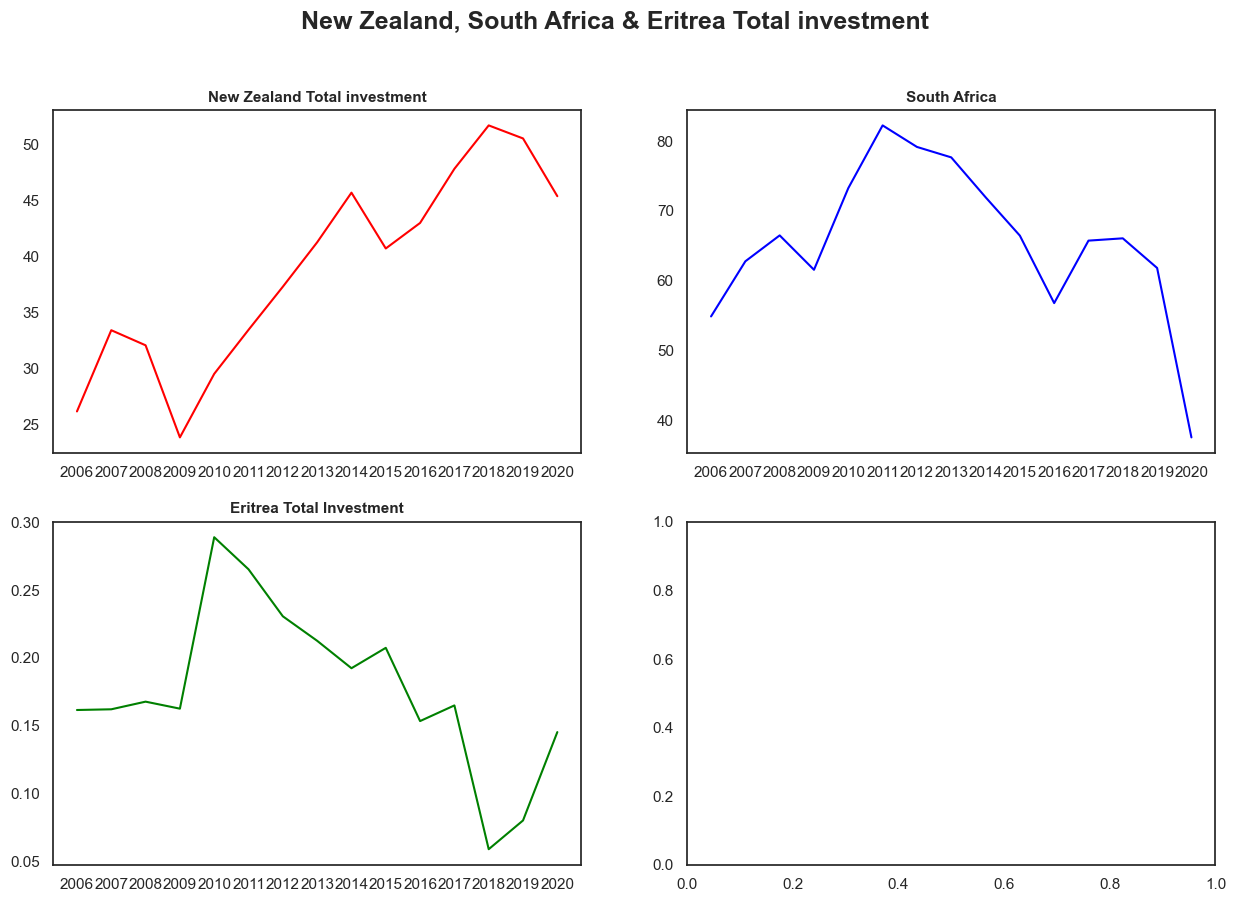

In [41]:
#Shown as small multiples Showing total investment
fig, ax = plt.subplots(2,2)

ax[0, 0].plot(df_NZ_SA_ERT_total_investment['Year'], df_NZ_SA_ERT_total_investment['New Zealand (Total Investment, USD Billions)'], color = 'red')
ax[0, 0].set_title('New Zealand Total investment', fontsize = 11, fontweight = 'bold')

ax[0, 1].plot(df_NZ_SA_ERT_total_investment['Year'], df_NZ_SA_ERT_total_investment['South Africa (Total Investment, USD Billions)'], color = 'blue')
ax[0, 1].set_title('South Africa', fontsize = 11, fontweight = 'bold')

ax[1, 0].plot(df_NZ_SA_ERT_total_investment['Year'], df_NZ_SA_ERT_total_investment['Eritrea (Total Investment, USD Billions)'], color = 'green')
ax[1, 0].set_title('Eritrea Total Investment', fontsize = 11, fontweight = 'bold')

plt.suptitle('New Zealand, South Africa & Eritrea Total investment', fontsize = 18, fontweight = 'bold')
plt.show()


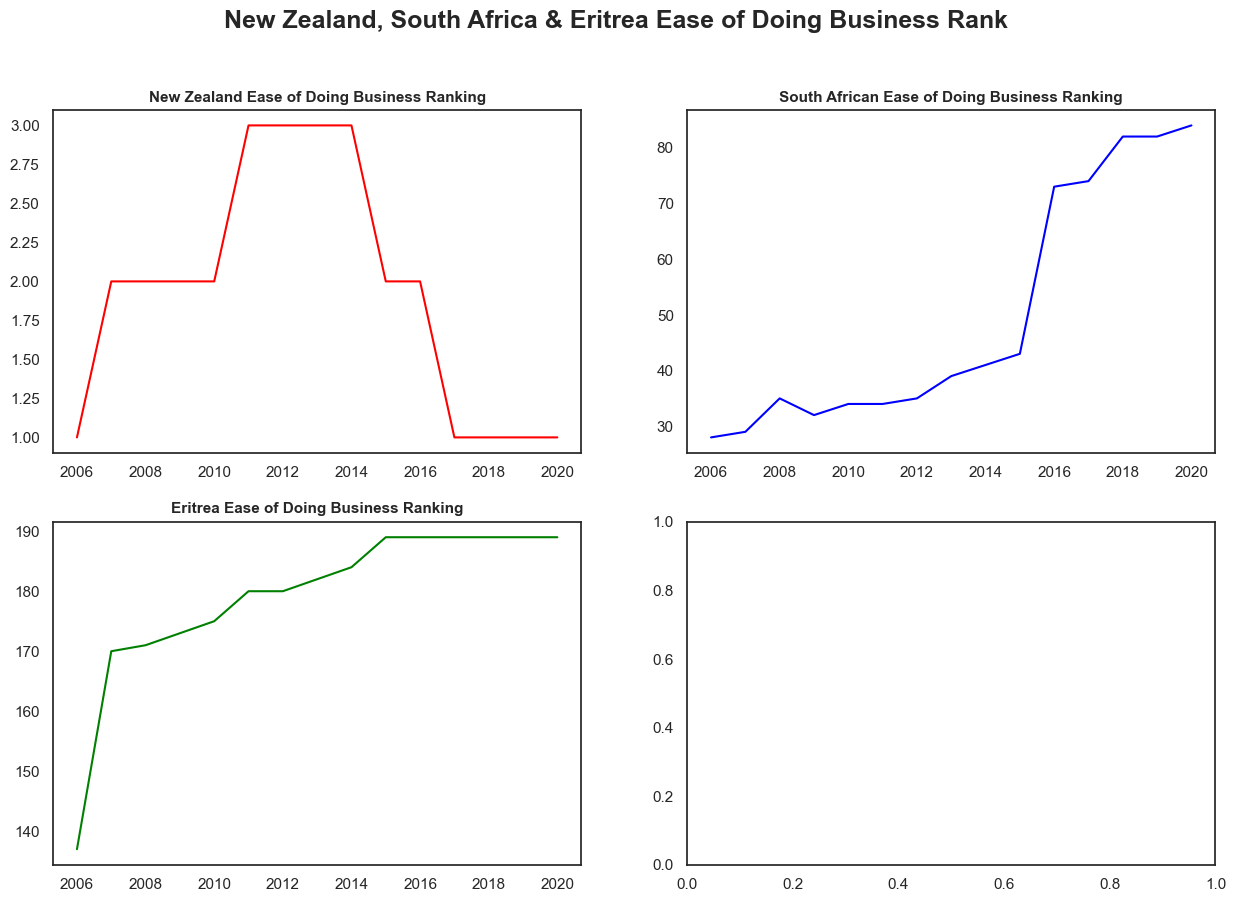

In [42]:
#Shown as small multiples Showing ease of doing business
fig, ax = plt.subplots(2,2)

ax[0, 0].plot(df_ease_of_doing_biz['Year'], df_ease_of_doing_biz['NewZealand: Ease of doing business index'], color = 'red')
ax[0, 0].set_title('New Zealand Ease of Doing Business Ranking', fontsize = 11, fontweight = 'bold')

ax[0, 1].plot(df_ease_of_doing_biz['Year'], df_ease_of_doing_biz['South Africa: Ease of doing business index'], color = 'blue')
ax[0, 1].set_title('South African Ease of Doing Business Ranking', fontsize = 11, fontweight = 'bold')


ax[1, 0].plot(df_ease_of_doing_biz['Year'], df_ease_of_doing_biz['Eritrea: Ease of doing business index'], color = 'green')
ax[1, 0].set_title('Eritrea Ease of Doing Business Ranking', fontsize = 11, fontweight = 'bold')

plt.suptitle('New Zealand, South Africa & Eritrea Ease of Doing Business Rank', fontsize = 18, fontweight = 'bold')
plt.show()

**The lower the ranking the easier it is to do business

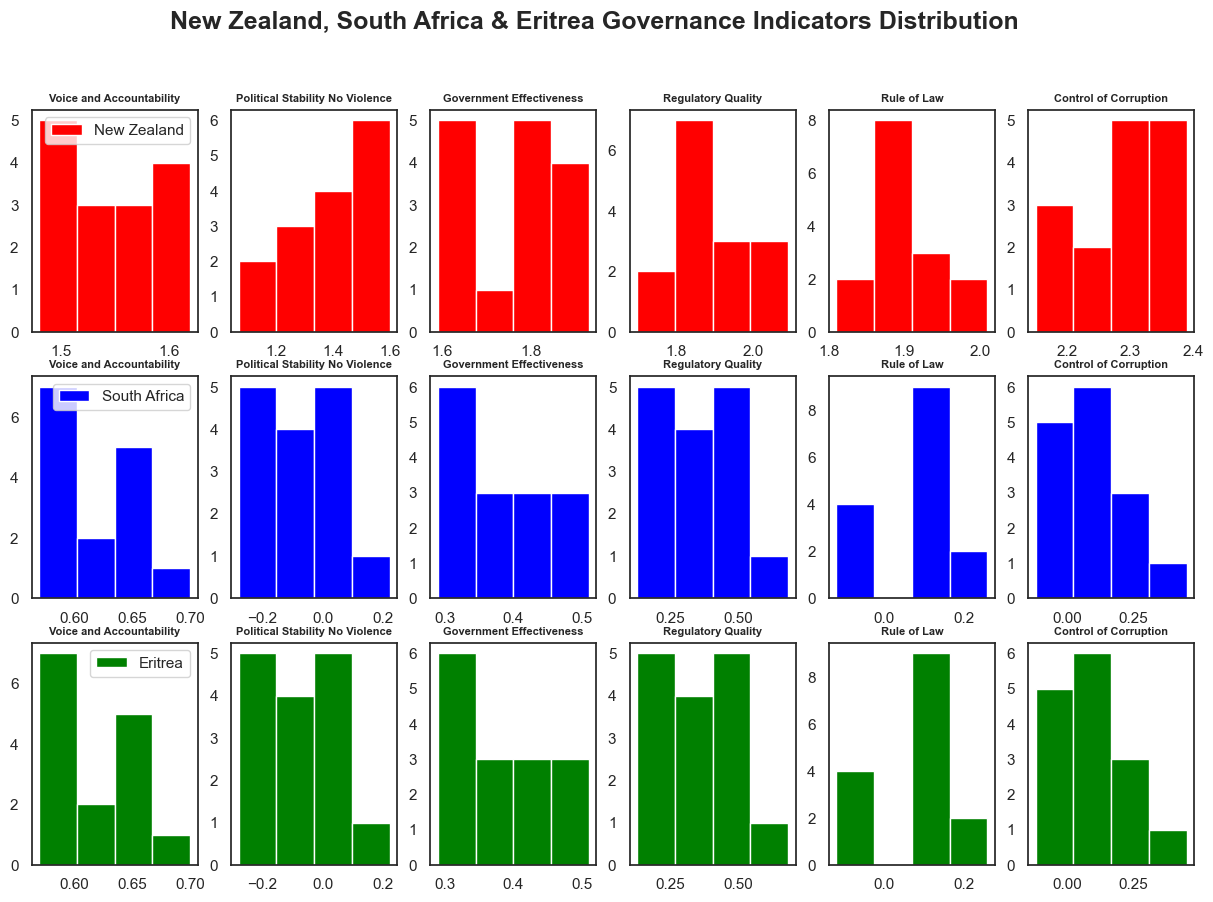

In [43]:
fig, ax = plt.subplots(3,6)

#New Zealand
ax[0, 0].hist(df_NewZealand_gov_indicators['Voice and Accountability'], bins=4, color = 'red')
ax[0, 0].set_title('Voice and Accountability', fontsize = 8, fontweight = 'bold')

ax[0, 1].hist(df_NewZealand_gov_indicators['Political Stability No Violence'], bins=4, color = 'red')
ax[0, 1].set_title('Political Stability No Violence', fontsize = 8, fontweight = 'bold')

ax[0, 2].hist(df_NewZealand_gov_indicators['Government Effectiveness'], bins=4, color = 'red')
ax[0, 2].set_title('Government Effectiveness', fontsize = 8, fontweight = 'bold')

ax[0, 3].hist(df_NewZealand_gov_indicators['Regulatory Quality'], bins=4, color = 'red')
ax[0, 3].set_title('Regulatory Quality', fontsize = 8, fontweight = 'bold')

ax[0, 4].hist(df_NewZealand_gov_indicators['Rule of Law'], bins=4, color = 'red')
ax[0, 4].set_title('Rule of Law', fontsize = 8, fontweight = 'bold')

ax[0, 5].hist(df_NewZealand_gov_indicators['Control of Corruption'], bins=4, color = 'red')
ax[0, 5].set_title('Control of Corruption', fontsize = 8, fontweight = 'bold')

#South Africa
ax[1, 0].hist(df_SouthAfrica_gov_indicators['Voice and Accountability'], bins=4, color = 'blue')
ax[1, 0].set_title('Voice and Accountability', fontsize = 8, fontweight = 'bold')

ax[1, 1].hist(df_SouthAfrica_gov_indicators['Political Stability No Violence'], bins=4, color = 'blue')
ax[1, 1].set_title('Political Stability No Violence', fontsize = 8, fontweight = 'bold')

ax[1, 2].hist(df_SouthAfrica_gov_indicators['Government Effectiveness'], bins=4, color = 'blue')
ax[1, 2].set_title('Government Effectiveness', fontsize = 8, fontweight = 'bold')

ax[1, 3].hist(df_SouthAfrica_gov_indicators['Regulatory Quality'], bins=4, color = 'blue')
ax[1, 3].set_title('Regulatory Quality', fontsize = 8, fontweight = 'bold')

ax[1, 4].hist(df_SouthAfrica_gov_indicators['Rule of Law'], bins=4, color = 'blue')
ax[1, 4].set_title('Rule of Law', fontsize = 8, fontweight = 'bold')

ax[1, 5].hist(df_SouthAfrica_gov_indicators['Control of Corruption'], bins=4, color = 'blue')
ax[1, 5].set_title('Control of Corruption', fontsize = 8, fontweight = 'bold')

#Eritrea
ax[2, 0].hist(df_SouthAfrica_gov_indicators['Voice and Accountability'], bins=4, color = 'green')
ax[2, 0].set_title('Voice and Accountability', fontsize = 8, fontweight = 'bold')

ax[2, 1].hist(df_SouthAfrica_gov_indicators['Political Stability No Violence'], bins=4, color = 'green')
ax[2, 1].set_title('Political Stability No Violence', fontsize = 8, fontweight = 'bold')

ax[2, 2].hist(df_SouthAfrica_gov_indicators['Government Effectiveness'], bins=4, color = 'green')
ax[2, 2].set_title('Government Effectiveness', fontsize = 8, fontweight = 'bold')

ax[2, 3].hist(df_SouthAfrica_gov_indicators['Regulatory Quality'], bins=4, color = 'green')
ax[2, 3].set_title('Regulatory Quality', fontsize = 8, fontweight = 'bold')

ax[2, 4].hist(df_SouthAfrica_gov_indicators['Rule of Law'], bins=4, color = 'green')
ax[2, 4].set_title('Rule of Law', fontsize = 8, fontweight = 'bold')

ax[2, 5].hist(df_SouthAfrica_gov_indicators['Control of Corruption'], bins=4, color = 'green')
ax[2, 5].set_title('Control of Corruption', fontsize = 8, fontweight = 'bold')
#ax[1, 0].plot(df_NZ_SA_ERT_total_investment['Year'], df_NZ_SA_ERT_total_investment['Eritrea (Total Investment, USD Billions)'], color = 'green')
#ax[1, 0].set_title('Eritrea Total Investment', fontsize = 11, fontweight = 'bold')

plt.suptitle('New Zealand, South Africa & Eritrea Governance Indicators Distribution', fontsize = 18, fontweight = 'bold')
ax[0,0].legend(labels = ['New Zealand'])
ax[1,0].legend(labels = ['South Africa'])
ax[2,0].legend(labels = ['Eritrea'])
plt.show()


# Regression Analysis

In [44]:
#Converting our data to numpy arrays
#The purpose of this is to create our independent(x) and dependent (y) variable to be used in the train test model

#Converting governace indicators to numpy arrays
nz_gov_indicator_array = df_NewZealand_gov_indicators.drop(df_NewZealand_gov_indicators.columns[0], axis = 1)
sa_gov_indicator_array = df_SouthAfrica_gov_indicators.drop(df_SouthAfrica_gov_indicators.columns[0], axis = 1)
ert_gov_indicator_array = df_Eritrea_gov_indicators.drop(df_Eritrea_gov_indicators.columns[0], axis = 1)

#Converting ease of doing business data to numpy arrays
nz_ease_of_biz_array = df_ease_of_doing_biz['NewZealand: Ease of doing business index']
sa_ease_of_biz_array = df_ease_of_doing_biz['South Africa: Ease of doing business index']
ert_ease_of_biz_array = df_ease_of_doing_biz['Eritrea: Ease of doing business index']

#Converting total investment data to numpy arrays
nz_total_invest_array = df_NZ_SA_ERT_total_investment['New Zealand (Total Investment, USD Billions)']
sa_total_invest_array = df_NZ_SA_ERT_total_investment['South Africa (Total Investment, USD Billions)']
ert_total_invest_array = df_NZ_SA_ERT_total_investment['Eritrea (Total Investment, USD Billions)']

#Combining the governace indicator arrays by using the stack function
gov_indicator_array = np.stack((nz_gov_indicator_array,
                               sa_gov_indicator_array, 
                               ert_gov_indicator_array), 
                               axis = 1)

#Combining the ease of business arrays by using the stack function
ease_of_biz_array = np.stack((nz_ease_of_biz_array,
                              sa_ease_of_biz_array,
                              ert_ease_of_biz_array),
                              axis = 1)

#Combining the total investment arrays by using the stack function
total_investment_array = np.stack((nz_total_invest_array,
                                  sa_total_invest_array,
                                  ert_total_invest_array), axis = 1)

In [45]:
#Rshaping the governace indicator array
gov_indicator_array = gov_indicator_array.reshape(45,6)

#Reshaping the ease of doing business array
ease_of_biz_array = ease_of_biz_array.reshape(45,1)

#Reshaping the total investment array
total_investment_array = total_investment_array.reshape(45,1)

#Combining the goverance indicators and ease of doing business arrays into one using h stack function
#These will be the independent variable of the model 
gov_indicator_and_ease_of_biz = np.hstack((gov_indicator_array,ease_of_biz_array))
gov_indicator_and_ease_of_biz

array([[ 1.50e+00,  1.26e+00,  1.59e+00,  1.70e+00,  1.81e+00,  2.33e+00,
         1.00e+00],
       [ 6.50e-01,  5.00e-02,  4.40e-01,  6.80e-01,  2.60e-01,  4.50e-01,
         2.80e+01],
       [-2.08e+00, -9.00e-01, -1.30e+00, -2.07e+00, -1.19e+00, -3.50e-01,
         1.37e+02],
       [ 1.48e+00,  1.24e+00,  1.66e+00,  1.71e+00,  1.84e+00,  2.33e+00,
         2.00e+00],
       [ 5.80e-01,  2.20e-01,  4.70e-01,  4.90e-01,  9.00e-02,  2.50e-01,
         2.90e+01],
       [-2.12e+00, -1.05e+00, -1.29e+00, -2.11e+00, -1.28e+00, -4.40e-01,
         1.70e+02],
       [ 1.48e+00,  1.16e+00,  1.68e+00,  1.80e+00,  1.86e+00,  2.31e+00,
         2.00e+00],
       [ 5.80e-01,  5.00e-02,  5.10e-01,  5.00e-01,  7.00e-02,  2.10e-01,
         3.50e+01],
       [-2.16e+00, -7.10e-01, -1.30e+00, -2.18e+00, -1.30e+00, -3.90e-01,
         1.71e+02],
       [ 1.48e+00,  1.07e+00,  1.85e+00,  1.83e+00,  1.93e+00,  2.39e+00,
         2.00e+00],
       [ 5.70e-01, -1.10e-01,  4.80e-01,  4.10e-01,  1.20e-0

# Train test model

In [46]:
#The independent variable
x = gov_indicator_and_ease_of_biz
#The dependent varibale
y = total_investment_array

In [47]:
# Splitting the data into two groups (training set and testing set)
# Setting the portion of the testing set to 25%
#** The train data set is used to fit the regression model, the testing data set is used to evaluate the fit of the regression model
# Random state will be set to 0 so as to reproduce the results.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [48]:
print(x_train)
print(x_train.shape)

[[-2.21e+00 -7.00e-01 -1.76e+00 -2.28e+00 -1.60e+00 -1.39e+00  1.89e+02]
 [-2.08e+00 -9.00e-01 -1.30e+00 -2.07e+00 -1.19e+00 -3.50e-01  1.37e+02]
 [ 7.00e-01 -2.40e-01  3.00e-01  2.00e-01 -1.20e-01  6.00e-02  8.40e+01]
 [ 1.62e+00  1.36e+00  1.80e+00  1.85e+00  1.89e+00  2.32e+00  3.00e+00]
 [ 1.58e+00  1.38e+00  1.88e+00  1.97e+00  1.90e+00  2.30e+00  3.00e+00]
 [ 6.00e-01 -5.00e-02  4.40e-01  4.20e-01  1.60e-01 -7.00e-02  3.90e+01]
 [ 5.90e-01  2.00e-02  4.10e-01  4.10e-01  1.50e-01  6.00e-02  3.40e+01]
 [ 6.40e-01 -2.70e-01  3.70e-01  1.60e-01 -8.00e-02  7.00e-02  8.20e+01]
 [-2.16e+00 -7.10e-01 -1.30e+00 -2.18e+00 -1.30e+00 -3.90e-01  1.71e+02]
 [ 6.00e-01 -3.00e-02  3.90e-01  3.60e-01  1.40e-01  1.30e-01  3.40e+01]
 [-2.12e+00 -1.05e+00 -1.29e+00 -2.11e+00 -1.28e+00 -4.40e-01  1.70e+02]
 [-2.23e+00 -7.70e-01 -1.41e+00 -2.21e+00 -1.35e+00 -6.30e-01  1.80e+02]
 [-2.17e+00 -6.60e-01 -1.70e+00 -2.19e+00 -1.63e+00 -1.31e+00  1.89e+02]
 [-2.20e+00 -8.80e-01 -1.36e+00 -2.24e+00 -1.35e+00

In [49]:
print(x_test)
print(x_test.shape)

[[ 1.53e+00  1.52e+00  1.84e+00  2.04e+00  1.95e+00  2.28e+00  2.00e+00]
 [ 6.30e-01 -2.30e-01  3.30e-01  1.30e-01 -1.00e-01 -3.00e-02  8.20e+01]
 [ 1.55e+00  1.53e+00  1.88e+00  1.92e+00  2.00e+00  2.28e+00  2.00e+00]
 [ 5.80e-01  2.20e-01  4.70e-01  4.90e-01  9.00e-02  2.50e-01  2.90e+01]
 [ 5.70e-01 -1.10e-01  4.80e-01  4.10e-01  1.20e-01  1.80e-01  3.20e+01]
 [ 6.40e-01 -1.50e-01  3.40e-01  2.90e-01  1.80e-01 -6.00e-02  4.10e+01]
 [ 6.50e-01 -2.10e-01  2.90e-01  2.80e-01  9.00e-02  3.00e-02  4.30e+01]
 [-2.20e+00 -6.80e-01 -1.37e+00 -2.24e+00 -1.31e+00 -4.90e-01  1.73e+02]
 [-2.19e+00 -6.10e-01 -1.72e+00 -2.22e+00 -1.58e+00 -1.31e+00  1.89e+02]
 [ 6.50e-01 -1.40e-01  3.10e-01  2.10e-01  1.20e-01  1.20e-01  7.30e+01]
 [-2.11e+00 -8.80e-01 -1.59e+00 -2.11e+00 -1.49e+00 -1.30e+00  1.89e+02]
 [-2.21e+00 -7.00e-01 -1.45e+00 -2.24e+00 -1.39e+00 -7.80e-01  1.80e+02]]
(12, 7)


In [50]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [51]:
y_predict = linear_model.predict(x_test)
print(y_predict)

[[41.03721962]
 [55.93021938]
 [43.22096967]
 [76.56344422]
 [72.83788119]
 [70.6553478 ]
 [66.24753174]
 [-3.86351   ]
 [ 7.83170493]
 [50.4935755 ]
 [ 5.206233  ]
 [ 0.20719264]]


In [52]:
# In multiple linear regression, the R2 represents the correlation coefficient between
# the observed values of the outcome variable (y) and the fitted (i.e., predicted) values of y. 
r2_score(y_test, y_predict)

0.9427075916264518

Therefore, this model shows that 94.27% of the data fits the regression model. This is quite a strong relationship which illustrates that these independent variable of of good governance and ease of doing business has a strong influence on the amount of investment that flows into a country. 